# Classification Approch

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.ensemble import RandomForestClassifier


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
filename = 'randomforest' #import model approch for  joblib

### PreProcess


In [3]:
names=['IR', 'MR', 'FF', 'Credibility', 'Competitiveness', 'OR', 'Class']
df = pd.read_csv('../Qualitative_Bankruptcy.data.txt',names=names)

#### Clean and Engeering Data

In [4]:
for col in names:
    print(df[col].value_counts())
    print('\n****\n')

IR
N    89
A    81
P    80
Name: count, dtype: int64

****

MR
N    119
A     69
P     62
Name: count, dtype: int64

****

FF
N    119
A     74
P     57
Name: count, dtype: int64

****

Credibility
N    94
P    79
A    77
Name: count, dtype: int64

****

Competitiveness
N    103
P     91
A     56
Name: count, dtype: int64

****

OR
N    114
P     79
A     57
Name: count, dtype: int64

****

Class
NB    143
B     107
Name: count, dtype: int64

****



In [5]:
X = df.drop(['Class'],axis = 1)
X = pd.get_dummies(data=X, drop_first=True)
y = df['Class']

#### Split Data in Train/Test for X and y


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=1099, stratify=y)


### Model

#### Create Model(s)

In [9]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [10]:
rfc = RandomForestClassifier()

In [11]:
pipe = Pipeline([('rfc',rfc)])

In [12]:
#hyperparams Value
n_estimators = list(range(20,150,5))
criterion = ["gini", "entropy", "log_loss"]
max_depth = [1,2,3,4,5,6,7]
max_features = ['sqrt' ,'log2', None]

In [14]:
hyp_param = {
    'rfc__n_estimators' : n_estimators,
    'rfc__criterion' : criterion,
    'rfc__max_depth' : max_depth,
    'rfc__max_features' : max_features,
}

In [17]:
full_model = GridSearchCV(
    estimator=pipe,
    param_grid=hyp_param,
    cv=5,
    verbose=2    
)

#### Train Model

In [18]:
full_model.fit(X_train,y_train)

Fitting 5 folds for each of 1638 candidates, totalling 8190 fits
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=20; total time=   0.1s
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=20; total time=   0.0s
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=20; total time=   0.0s
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=20; total time=   0.0s
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=20; total time=   0.0s
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=25; total time=   0.0s
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=25; total time=   0.0s
[CV] END rfc__criterion=gini, rfc__max_depth=1, rfc__max_features=sqrt, rfc__n_estimators=25; total time=   0.0s
[CV] END rfc__criterion=gini, r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             param_grid={'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'rfc__max_features': ['sqrt', 'log2', None],
                         'rfc__n_estimators': [20, 25, 30, 35, 40, 45, 50, 55,
                                               60, 65, 70, 75, 80, 85, 90, 95,
                                               100, 105, 110, 115, 120, 125,
                                               130, 135, 140, 145]},
             verbose=2)

### Evaluate model

In [19]:
y_pred = full_model.predict(X_test)

#### Test On data

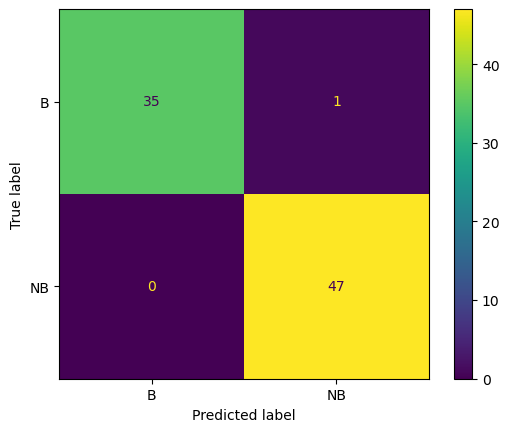

In [20]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred)
                       ,display_labels=full_model.classes_).plot()

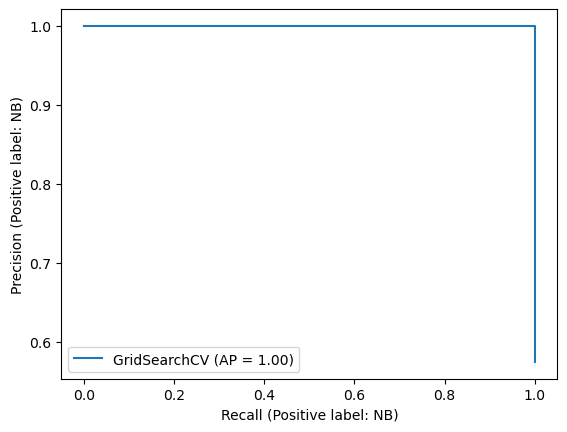

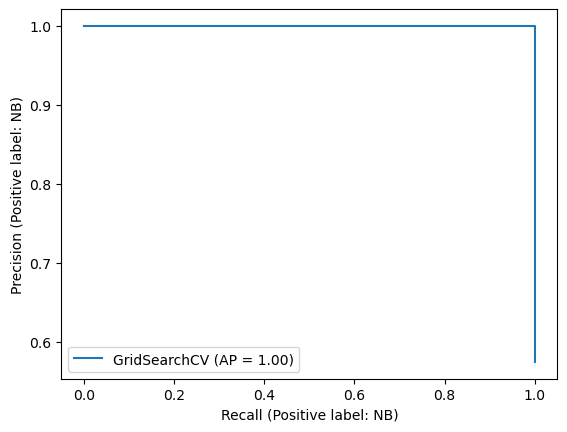

In [21]:
PrecisionRecallDisplay.from_estimator(estimator=full_model,
                                     X=X_train,
                                     y=y_train).plot()

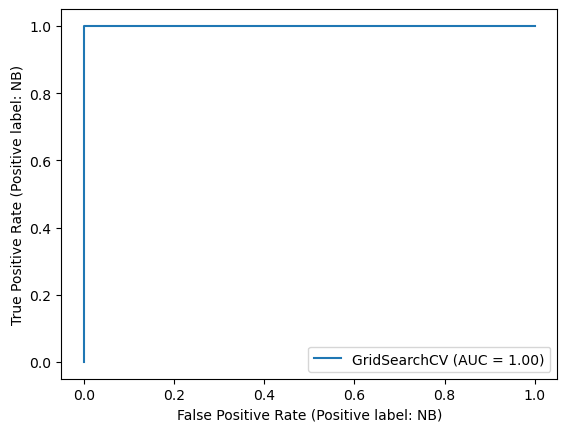

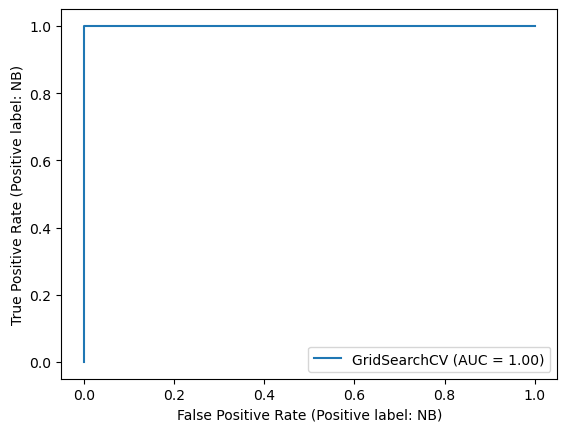

In [30]:
RocCurveDisplay.from_estimator(estimator=full_model,
                                     X=X_train,
                                     y=y_train).plot()

In [ ]:
RocCurveDisplay.from_predictions(y_pred=y_pred,
                                 y_true=y_test).plot()

In [31]:
print(classification_report(y_pred=y_pred,
                      y_true=y_test))

              precision    recall  f1-score   support

           B       1.00      0.97      0.99        36
          NB       0.98      1.00      0.99        47

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



In [32]:
full_model.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': 1,
 'rfc__max_features': 'sqrt',
 'rfc__n_estimators': 35}

### Final Model(s)


In [33]:
rfc_final = RandomForestClassifier(
    criterion='gini',
    max_depth=1,
    max_features='sqrt',
    n_estimators=35
)

#### Train on all Data 

In [34]:
rfc_final.fit(X,y)

RandomForestClassifier(max_depth=1, n_estimators=35)

##### no need

#### Save with joblib

In [35]:
import joblib
joblib.dump(value=rfc_final,filename=filename)

['randomforest']

# Congratulations!!!

#### Created and trained by  Matin1099.
